<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/%EC%9C%A0%EC%9D%98%EB%AF%B8%ED%95%9C_%EC%A7%80%EC%A0%90_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

In [5]:
df = df.drop(['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)','최근 3개월 공모주 수', '희망공모가_하한',  '희망공모가_상한','일반청약자(비율)', 'ROE'], axis=1)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 청약경쟁률

Optimization terminated successfully.
         Current function value: 0.464828
         Iterations 9


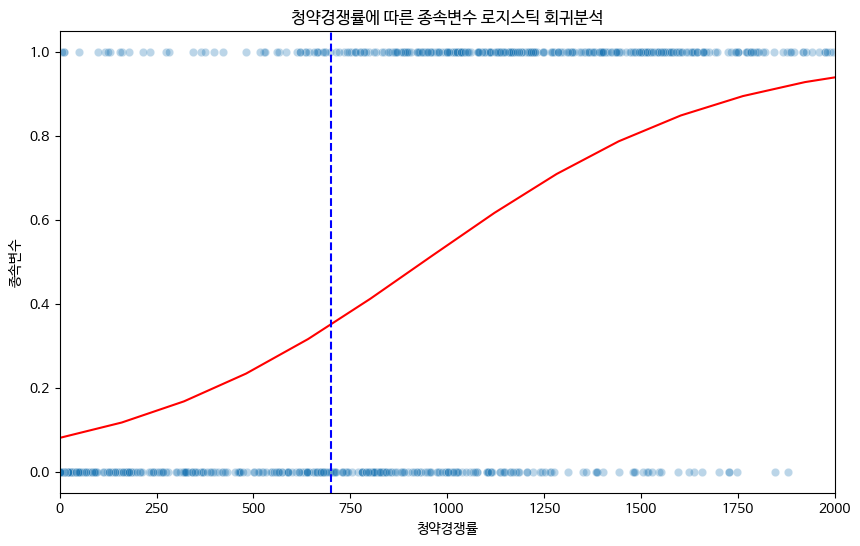

In [15]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['청약경쟁률']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['청약경쟁률'].min(), df['청약경쟁률'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='청약경쟁률', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 청약경쟁률 700 기준 선
plt.xlim(0, 2000)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('청약경쟁률')
plt.ylabel('종속변수')
plt.title('청약경쟁률에 따른 종속변수 로지스틱 회귀분석')
plt.show()

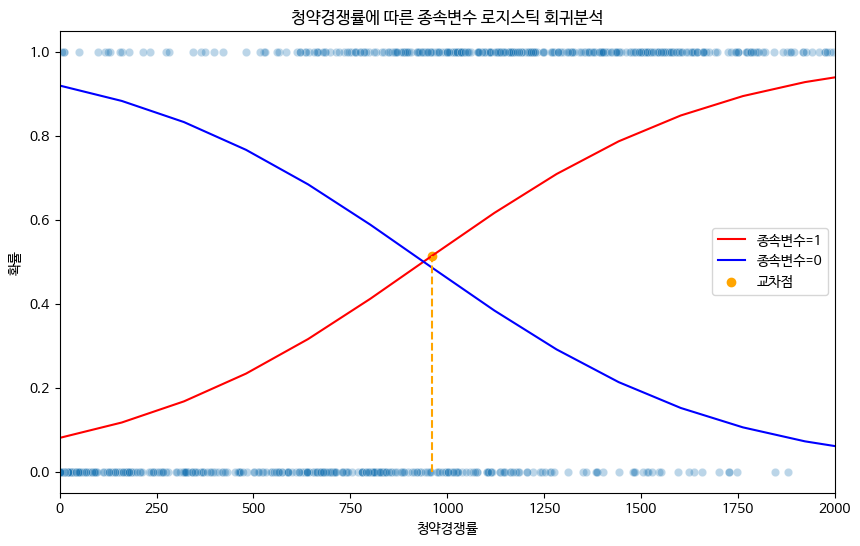

청약경쟁률에서 확률이 0.5가 되는 지점 (천 단위): 961.8229859719439


In [16]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['청약경쟁률'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0, 2000)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('청약경쟁률')
plt.ylabel('확률')
plt.title('청약경쟁률에 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"청약경쟁률에서 확률이 0.5가 되는 지점 (천 단위): {cross_point_x}")


## 공모가

Optimization terminated successfully.
         Current function value: 0.670704
         Iterations 5


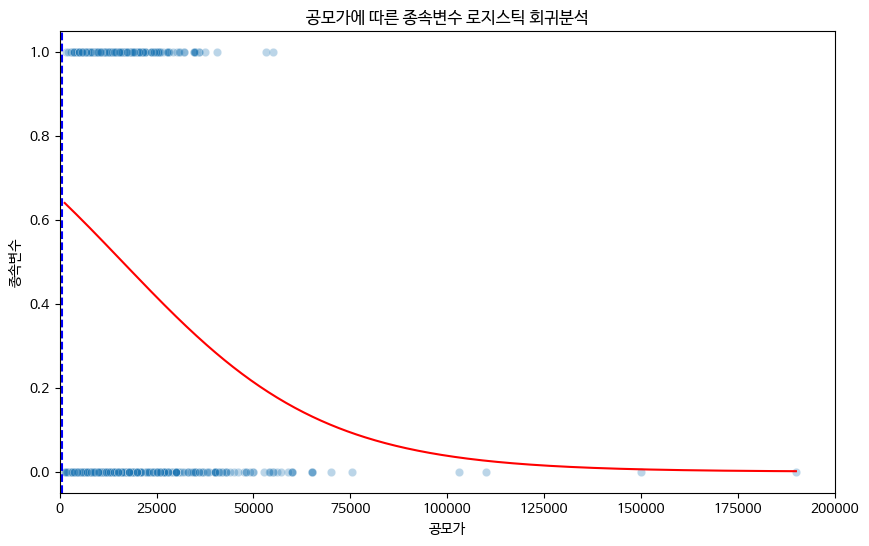

In [36]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['공모가']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['공모가'].min(), df['공모가'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='공모가', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 공모가 700 기준 선
plt.xlim(0, 200000)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('공모가')
plt.ylabel('종속변수')
plt.title('공모가에 따른 종속변수 로지스틱 회귀분석')
plt.show()

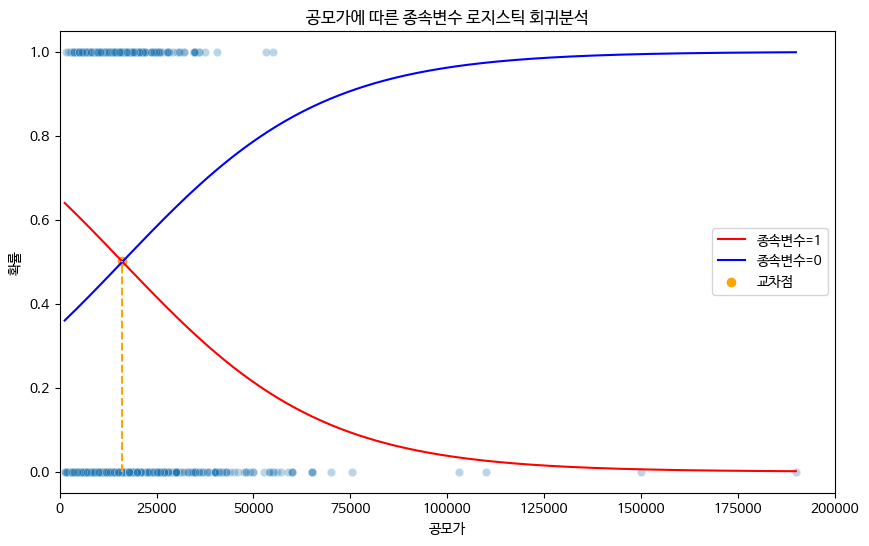

청약경쟁률에서 확률이 0.5가 되는 지점: 16048.09619238477


In [37]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['공모가'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0, 200000)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('공모가')
plt.ylabel('확률')
plt.title('공모가에 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"청약경쟁률에서 확률이 0.5가 되는 지점: {cross_point_x}")


## 의무보유확약

Optimization terminated successfully.
         Current function value: 0.618536
         Iterations 6


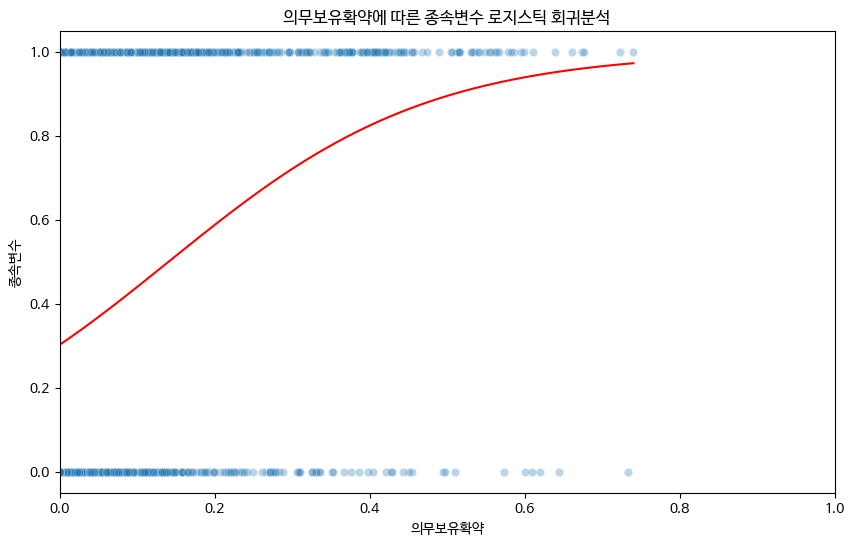

In [39]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['의무보유확약']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['의무보유확약'].min(), df['의무보유확약'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='의무보유확약', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 의무보유확약 700 기준 선
plt.xlim(0, 1)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('의무보유확약')
plt.ylabel('종속변수')
plt.title('의무보유확약에 따른 종속변수 로지스틱 회귀분석')
plt.show()

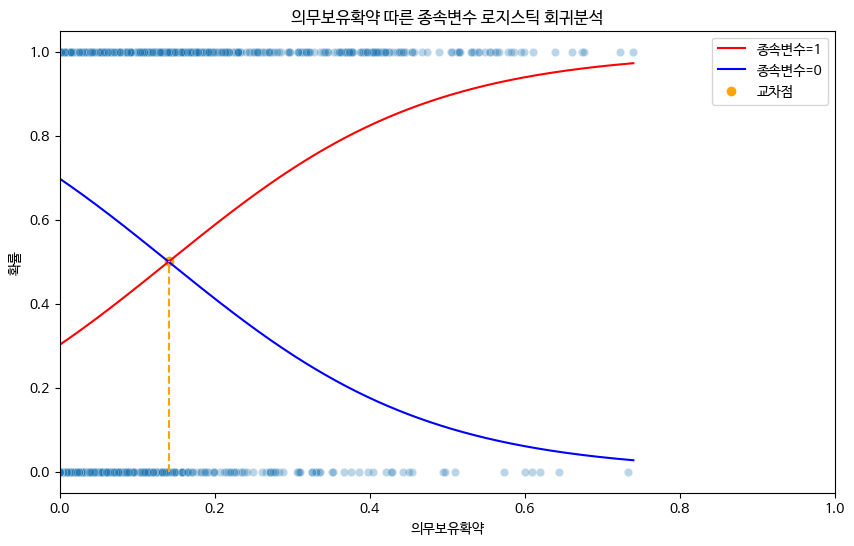

의무보유확약에서 확률이 0.5가 되는 지점: 0.140938877755511


In [40]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['의무보유확약'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0, 1)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('의무보유확약')
plt.ylabel('확률')
plt.title('의무보유확약 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"의무보유확약에서 확률이 0.5가 되는 지점: {cross_point_x}")


## 추가 유의미 변수 - 최근"따"비율

Optimization terminated successfully.
         Current function value: 0.645171
         Iterations 5


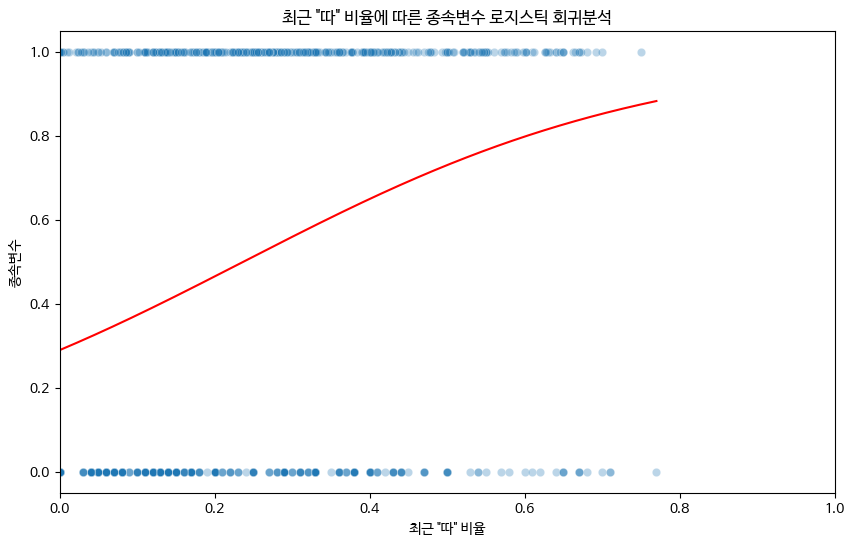

In [41]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['최근 "따" 비율']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['최근 "따" 비율'].min(), df['최근 "따" 비율'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='최근 "따" 비율', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 최근 "따" 비율 700 기준 선
plt.xlim(0, 1)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('최근 "따" 비율')
plt.ylabel('종속변수')
plt.title('최근 "따" 비율에 따른 종속변수 로지스틱 회귀분석')
plt.show()

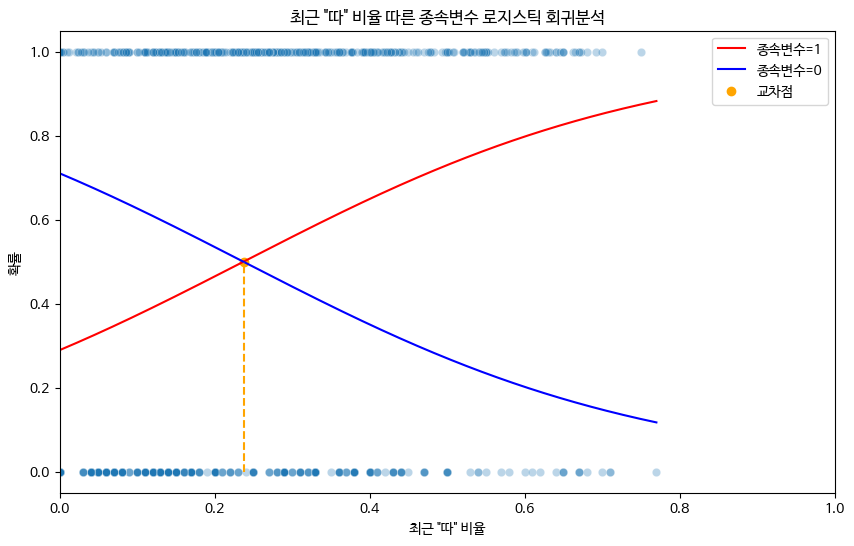

최근 "따" 비율에서 확률이 0.5가 되는 지점: 0.2376352705410822


In [44]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['최근 "따" 비율'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0, 1)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('최근 "따" 비율')
plt.ylabel('확률')
plt.title('최근 "따" 비율 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"최근 \"따\" 비율에서 확률이 0.5가 되는 지점: {cross_point_x}")


## 추가 유의미 변수 - 전문투자자(비율)

Optimization terminated successfully.
         Current function value: 0.677364
         Iterations 4


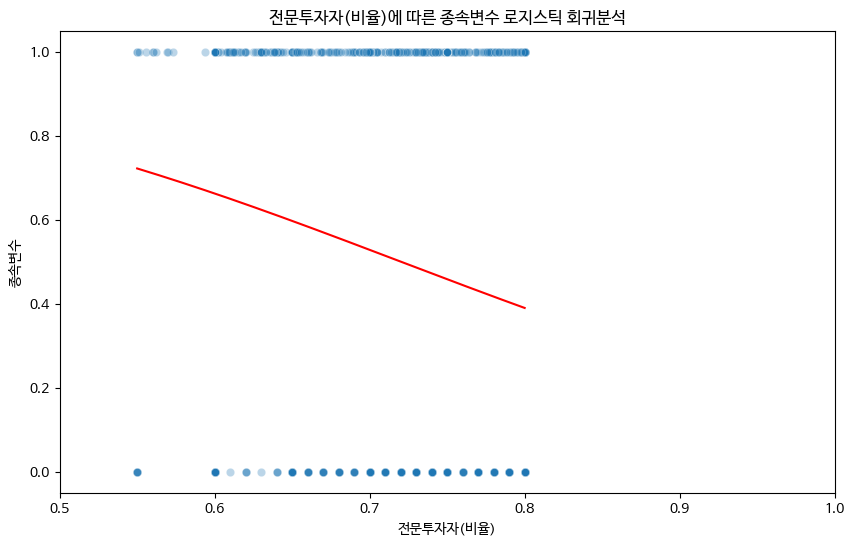

In [47]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['전문투자자(비율)']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['전문투자자(비율)'].min(), df['전문투자자(비율)'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='전문투자자(비율)', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 전문투자자(비율) 700 기준 선
plt.xlim(0.5, 1)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('전문투자자(비율)')
plt.ylabel('종속변수')
plt.title('전문투자자(비율)에 따른 종속변수 로지스틱 회귀분석')
plt.show()

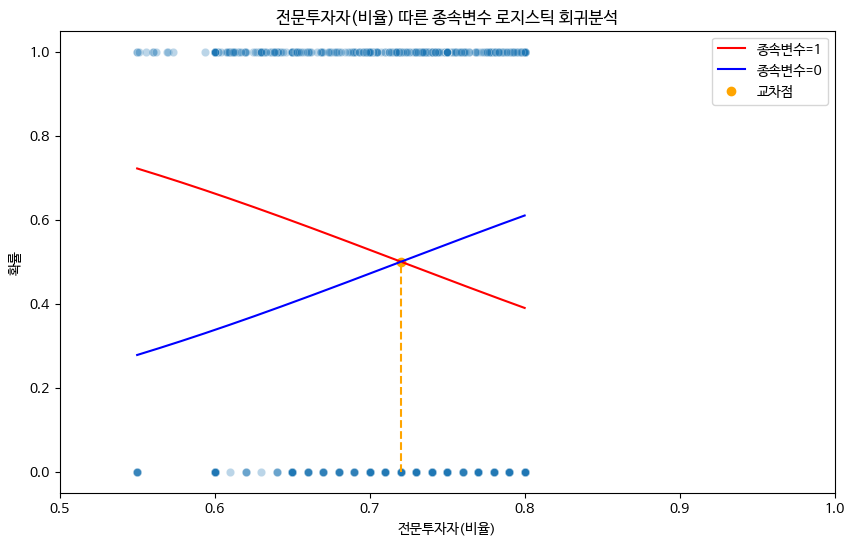

전문투자자(비율)에서 확률이 0.5가 되는 지점: 0.7203406813627254


In [48]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['전문투자자(비율)'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0.5, 1)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('전문투자자(비율)')
plt.ylabel('확률')
plt.title('전문투자자(비율) 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"전문투자자(비율)에서 확률이 0.5가 되는 지점: {cross_point_x}")


## 추가 유의미 변수 - 밴드수익률(공모가/공모가_상한)

Optimization terminated successfully.
         Current function value: 0.601697
         Iterations 6


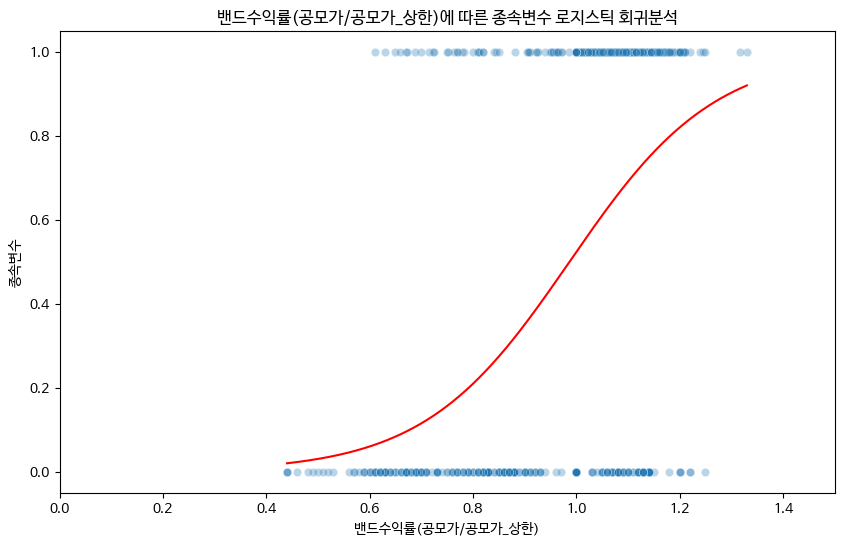

In [53]:
column_names = df.columns.tolist()
df = df[column_names]


# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(df['종속변수'], sm.add_constant(df['밴드수익률(공모가/공모가_상한)']))
result = logit_model.fit()

# 로지스틱 회귀선을 그리기 위한 x값 생성
x_values = np.linspace(df['밴드수익률(공모가/공모가_상한)'].min(), df['밴드수익률(공모가/공모가_상한)'].max(), 500)

# 로지스틱 회귀선 생성
y_values = result.predict(sm.add_constant(x_values))

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='밴드수익률(공모가/공모가_상한)', y='종속변수', alpha=0.3)
plt.plot(x_values, y_values, color='red')
plt.axvline(x=700, color='blue', linestyle='--')  # 밴드수익률(공모가/공모가_상한) 700 기준 선
plt.xlim(0, 1.5)  # x축 범위를 0부터 500까지로 설정
plt.xlabel('밴드수익률(공모가/공모가_상한)')
plt.ylabel('종속변수')
plt.title('밴드수익률(공모가/공모가_상한)에 따른 종속변수 로지스틱 회귀분석')
plt.show()

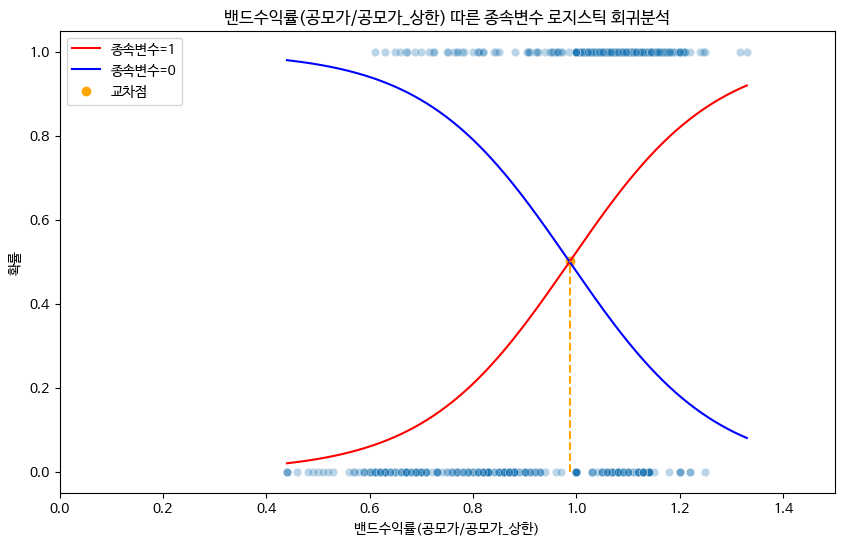

밴드수익률(공모가/공모가_상한)에서 확률이 0.5가 되는 지점: 0.987555110220441


In [54]:
# 그래프 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['밴드수익률(공모가/공모가_상한)'], y=df['종속변수'], alpha=0.3)
plt.plot(x_values, y_values, color='red', label='종속변수=1')
plt.plot(x_values, 1-y_values, color='blue', label='종속변수=0')  # 종속변수가 0일 확률
plt.xlim(0, 1.5)

# 교차점 찾기
cross_point_idx = np.abs(y_values - (1 - y_values)).argmin()
cross_point_x = x_values[cross_point_idx]
cross_point_y = y_values[cross_point_idx]

# 교차점 표시
plt.scatter(cross_point_x, cross_point_y, color='orange', label='교차점')
plt.plot([cross_point_x, cross_point_x], [0, cross_point_y], color='orange', linestyle='--')

plt.xlabel('밴드수익률(공모가/공모가_상한)')
plt.ylabel('확률')
plt.title('밴드수익률(공모가/공모가_상한) 따른 종속변수 로지스틱 회귀분석')
plt.legend()
plt.show()

# 교차점 값 출력
print(f"밴드수익률(공모가/공모가_상한)에서 확률이 0.5가 되는 지점: {cross_point_x}")
